In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import emoji
import re, string
from collections import defaultdict
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import RegexpParser
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from tqdm.notebook import tqdm
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
import fasttext
import matplotlib.pyplot as plt

### Natural Language Processing 

NLP is crucial in numerous daily business areas. Common fields where NLP is applied:

- Customer sentiments understanding
- Extracting information from product descriptions and user reviews
- Spam detection, priority inbox, calendar event extraction, and auto-complete.
- Query understanding, question answering, and result ranking.
- NLP advancements find applications in healthcare, and finance for automated report generation
- And many more

### Natural Language Processin Tasks 

NLP Tasks:
- Text classification: Categorizing text into known categories (sentiment analysis, reviews)
- Information extraction: Extracting relevant information from text, like people or places.
- Text summarization: Creating concise summaries while preserving the core ideas and meaning.
- Information retrieval: Finding relevant documents from a large collection, like in search engines.
- Question answering: Building systems to automatically answer questions in natural language.
- Language modeling: Predicting the next word in a sentence based on previous words (speech recognition,  translation).


### Natual Language Processing Models

- Machine learning models is applied to textual data, similar to other types of data like images and speech. NLP tasks often use supervised machine learning techniques such as classification and regression (like, SVM, and RandomForest).

- Deep learning methods like recurrent neural networks (RNNs) and long short-term memory (LSTM) networks can handle sequential language processing while convolutional neural networks (CNNs) excel in text classification tasks. Transformers, like BERT, model textual context using self-attention mechanisms and autoencoders learn compressed representations of input data.

**Language** is a organized method of communication, comprising elements like characters, words, and sentences.  Familiarity with linguistic concepts is important to work with NLP models.

### Natural Lanugage Processing Workflow:
The primary elements of a typical NLP systeme reflect the best MLOps practices:

- Data acquisition: Gathering relevant data for the NLP system.
- Text cleaning: Removing unnecessary or irrelevant elements from the text data.
- Pre-processing: Preparing the text data for further analysis and modeling.
- Feature engineering: Transforming the pre-processed text data into meaningful features.
- Modeling: Developing models using the transformed features for NLP tasks.
- Evaluation: Assessing the performance and effectiveness of the developed models.
- Deployment: Implementing the NLP system.

### NLP Basics 



### Text cleaning and  preprocessing

Common preprocessing steps used in NLP models:

- Step 1: Sentence segmentation and word tokenization.
- Step 2: Stop word removal, stemming and lemmatization, removing digits/punctuation,lowercasing, etc.
- Step 3: Normalization, language detection, code mixing, transliteration, etc.


Most NLP libraries come with some form of sentence and word splitting implemented.

**Stemming** refers to the process of removing suffixes and reducing a word to some
base form such that all different variants of that word can be represented by the same
form (e.g., “car” and “cars” are both reduced to “car”).

**Lemmatization** is the process of mapping all the different forms of a word to its base
word, or lemma. While this seems close to the definition of stemming, they are, in
fact, different. For example, the adjective “better,” when stemmed, remains the same.

Lemmatizer minimizes text ambiguity. Basically, it will convert all words having the same meaning but different representation to their base form. It reduces the word density in the given text and helps in preparing the accurate features for training machine. 

Lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

#### Tokenization

In [9]:
text = 'Seek not the favor of the multitude; it is seldom got by honest and lawful means.'\
' But seek the testimony of few; and number not voices, but weigh them.' 

In [10]:
# Tokenize sentencs and words
print(sent_tokenize(text))

['Seek not the favor of the multitude; it is seldom got by honest and lawful means.', 'But seek the testimony of few; and number not voices, but weigh them.']


In [5]:
print(word_tokenize(text))

['Seek', 'not', 'the', 'favor', 'of', 'the', 'multitude', ';', 'it', 'is', 'seldom', 'got', 'by', 'honest', 'and', 'lawful', 'means', '.', 'But', 'seek', 'the', 'testimony', 'of', 'few', ';', 'and', 'number', 'not', 'voices', ',', 'but', 'weigh', 'them', '.']


#### Stop words

Certain commonly used words in the English language, ("a," "an," "the," "of," "in," ) do not hold significant meaning for NLP tasks.  These words are referred to as stop words and are generally excluded from further analysis in such scenarios. There is no universally accepted standard list of stop words. There are some well-known lists available (like provided by NLTK)

In [6]:
all_stop_words = list(stopwords.words("english"))
print(all_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# Remove stop words from our sentence 
def stop_removal(x:list): 
    preprocessed_text =[]
    
    for word in x:
        if word not in all_stop_words:
            preprocessed_text.append(word)
    print(preprocessed_text)

In [8]:
words_list = word_tokenize(text)
stop_removal(words_list)

['Seek', 'favor', 'multitude', ';', 'seldom', 'got', 'honest', 'lawful', 'means', '.', 'But', 'seek', 'testimony', ';', 'number', 'voices', ',', 'weigh', '.']


#### Stemming

In [9]:
derivatives = ["communicate",
               "communication",
               "communicative",
               "communicator",
               "communicated",
               "communicates",
               "communicating",
               "communicable",
               "communicatively",
               "communicatory",
               "miscommunication"]

In [10]:
#Stemmers remove morphological affixes from words, leaving only the word stem.
def stemmer(x:list):
    
    stemmer = PorterStemmer()
    preprocessed_text =[]
    for word in x:
            preprocessed_text.append(stemmer.stem(word))
    print(preprocessed_text)

In [11]:
stemmer(derivatives)

['commun', 'commun', 'commun', 'commun', 'commun', 'commun', 'commun', 'communic', 'commun', 'communicatori', 'miscommun']


In [12]:
stemmer(words_list)

['seek', 'not', 'the', 'favor', 'of', 'the', 'multitud', ';', 'it', 'is', 'seldom', 'got', 'by', 'honest', 'and', 'law', 'mean', '.', 'but', 'seek', 'the', 'testimoni', 'of', 'few', ';', 'and', 'number', 'not', 'voic', ',', 'but', 'weigh', 'them', '.']


#### Lemmatization

**Lemmatization** is the process of mapping all the different forms of a word to its base
word, or lemma. While this seems close to the definition of stemming, they are, in
fact, different. For example, the adjective “better,” when stemmed, remains the same.

In [18]:
def preprocessor(x:list):
    sentence=str(x)
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [19]:
preprocess(text)

'seek favor multitude seldom got honest lawful means seek testimony number voices weigh'

Example: "She is reading a book."
POS Tags:

- "She" - PRON (pronoun)
- "is" - VERB (verb)
- "reading" - VERB (verb)
- "a" - DET (determiner)
- "book" - NOUN (noun)

In [13]:
def preprocessor(x:list): # x text with sentences
    
        preprocessed_text = []
        tokenizer = PunktSentenceTokenizer()
        tokenized = tokenizer.tokenize(x)
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            preprocessed_text.append(tagged)
        return preprocessed_text

In [14]:
a = preprocessor(text)

In [15]:
a[1]

[('But', 'CC'),
 ('seek', 'VBP'),
 ('the', 'DT'),
 ('testimony', 'NN'),
 ('of', 'IN'),
 ('few', 'JJ'),
 (';', ':'),
 ('and', 'CC'),
 ('number', 'NN'),
 ('not', 'RB'),
 ('voices', 'NNS'),
 (',', ','),
 ('but', 'CC'),
 ('weigh', 'VBP'),
 ('them', 'PRP'),
 ('.', '.')]

### What is chunking?
Chunking is defined as the process of natural language processing used to identify parts of speech and short phrases present in a given sentence. Chunking is used to get the required phrases from a given sentence. However, POS tagging can be used only to spot the parts of speech that every word of the sentence belongs to.

In [16]:
patterns= """mychunk:{<NN.?>*<IN.?>*<DT.?>}"""
chunker = RegexpParser(patterns)
print("After Regex:",chunker)

After Regex: chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?>*<IN.?>*<DT.?>'>


In [ ]:
output = chunker.parse(a[0])
print("After Chunking",output)
output.draw()

After Chunking (S
  Seek/MD
  not/RB
  (mychunk the/DT)
  (mychunk favor/NN of/IN the/DT)
  multitude/NN
  ;/:
  it/PRP
  is/VBZ
  seldom/JJ
  got/NNS
  by/IN
  honest/NN
  and/CC
  lawful/JJ
  means/NNS
  ./.)


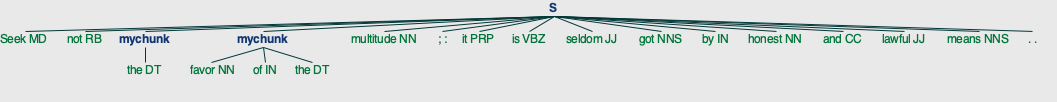

### Named Entity Recognition

NER, which stands for Named Entity Recognition, is the information extraction task that involves identifying specific entities within a document. These entities can be names of individuals, locations, organizations, as well as specialized strings like money expressions, dates, product names, law or article references, and more. NER plays a crucial role in various NLP applications that require extracting valuable information.

Text: "Barack Obama served as the 44th President of the United States."
- Entity: Person - "Barack Obama"
- Entity: Position - "44th President"
- Entity: Location - "United States"

Text: "The book 'To Kill a Mockingbird' was written by Harper Lee."
- Entity: Book - "To Kill a Mockingbird"
- Entity: Person - "Harper Lee"

In this project we will be working with three text based datasets
- Twitter sentiment analysis
- Harry Potter Script
- Dataset from "Harry Potter and the Action Prediction Challenge from Natural Language' (
More details : https://arxiv.org/pdf/1905.11037.pdf

In [28]:
data = pd.read_csv('DS MLE Fundamentals/Data/NLP/HP/hp_script.csv',encoding='cp1252')

In [29]:
data.head(5)

,ID_number,scene,character_name,dialogue
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr..."
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad."
3,4,1,Minerva McGonagall,And the boy?
4,5,1,Albus Dumbledore,Hagrid is bringing him.


In [30]:
data.character_name.value_counts().head(5)

Harry Potter          230
Ron Weasley           120
Hermione Granger       92
Rubeus Hagrid          81
Minerva McGonagall     31
Name: character_name, dtype: int64

In [31]:
# Add new features 
data['scene_word_count'] = data['dialogue'].map(lambda x:len(re.findall(r'\w+', x)))

In [32]:
#
count_scene_words = pd.DataFrame(data = data.groupby(['character_name'])['scene_word_count'].sum())
count_scene_words.sort_values(by=['scene_word_count'], ascending=False).head(5)

,scene_word_count
character_name,
Harry Potter,1762
Rubeus Hagrid,1527
Ron Weasley,1019
Hermione Granger,1009
Albus Dumbledore,721


Prepare the dataset from the 'Harry Potter and the Action Prediction Challenge from Natural Language'

In [47]:
directory = 'DS MLE Fundamentals/Data/NLP/HP/fanfiction_texts'
files = os.listdir(directory)
len(files)

36225

In [48]:
#Use NLTK’s currently recommended part of speech tagger to tag the given list of tokens

def wordnet(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"N": wordnet.NOUN,
                "V": wordnet.VERB,
                "J": wordnet.ADJ,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [49]:
# Define preprocessor
lemmatizer = WordNetLemmatizer()
mystopwords = stopwords.words("english")

def preprocessor(file):
    result = []
    text = " ".join([line.lower().strip() for line in open(directory + file)])
    sentences = sent_tokenize(text)

    for sentence in sentences:
        sentence = re.sub("[^a-zA-Z]", " ", sentence)
        words = [lemmatizer.lemmatize(word, 'v') for word in \
                 [lemmatizer.lemmatize(word, wordnet(word))\
                  for word in sentence.strip().split()] if word not in mystopwords and len(word) > 1]
        result.append(words)
    
    return result

In [ ]:
# Write data to txt 
f = open('/Users/brucebanner/Desktop/Repositories/Clones and local/Portfolio/DS MLE Fundamentals/Data/NLP/lemms.txt', "w")

for file in tqdm(files, total=len(files)): 
    processed_doc = preprocessor(file)
    for sentence in processed_doc:
        f.writelines(" ".join(sentence) + "\n")
f.close()

In [230]:
data = pd.read_csv("Data/NLP/lemms.txt", sep='\t', names=['sentences'])

## Exploratory data analysis

In [41]:
distributor = FreqDist()

for sentence in data['sentences']:
   words = sentence.split()
   distributor.update(words)

most_frequent = pd.DataFrame([(word[0], word[1]) for word in distributor.most_common(1000)], columns=['Word','Frequency'])


In [43]:
most_frequent.head(10)

,Word,Frequency
0,harry,53612
1,say,33838
2,know,23698
3,look,23238
4,go,21282
5,would,19522
6,think,18408
7,get,18123
8,one,18037
9,hermione,16532


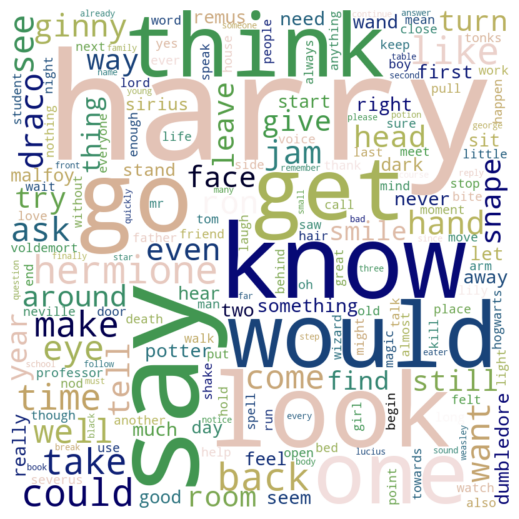

In [59]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,
                      height = 800,
                      prefer_horizontal=0.9,
                      background_color ='white',
                      contour_width=3,
                      contour_color='steelblue',
                      colormap='gist_earth').generate_from_frequencies(distributor)

# Display the image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [117]:
spell_names = [
    "Accio",
    "Alohomora",
    "Crucio",
    "Expelliarmus",
    "Imperio",
    "Protego",
    "Lumos",
    "Riddikulus",
    "Sectumsempra",
    "Stupefy",
    "Obliviate"
]

spell_names = " ".join(spell_names).lower().split()
result = []

for word in distributor.keys():
    if word in spell_names:
        result.append((word, distributor[word]))
df = pd.DataFrame(result, columns=['Spell', 'Frequency'])
df.sort_values(by='Frequency',ascending=False)

,Spell,Frequency
4,crucio,189
6,stupefy,151
2,lumos,141
5,accio,123
0,obliviate,85
8,expelliarmus,79
7,protego,51
10,riddikulus,40
1,alohomora,38
3,imperio,33


In [240]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocessor(x:list):
    sentence=str(x)
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [241]:
data['preprocessed']=data['dialogue'].map(lambda x:preprocess(x))

In [242]:
popular_words = Counter(" ".join(data["preprocessed"]).split()).most_common(10)
popular_words

[('harry', 88),
 ('know', 50),
 ('one', 48),
 ('see', 45),
 ('potter', 41),
 ('well', 41),
 ('got', 39),
 ('come', 38),
 ('right', 32),
 ('hagrid', 30)]

In [180]:
Severus = data[data['character_name']=='Severus Snape']

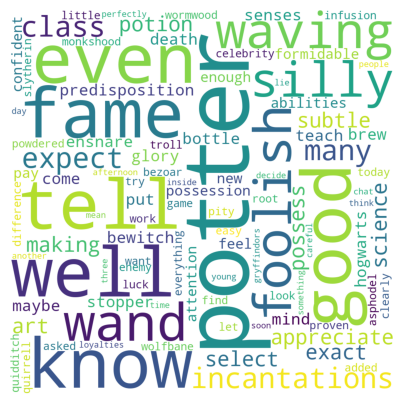

In [184]:
Severus_text = " ".join(line for line in Severus["preprocessed"])
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=15).generate(Severus_text)
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word embedding models

In [254]:
all_words = [i.split() for i in data['preprocessed']]

In [260]:
model = word2vec.Word2Vec(all_words, min_count=2, workers=4)

In [264]:
model.wv.most_similar('magic')

[('troll', 0.32707056403160095),
 ('pay', 0.30046960711479187),
 ('tried', 0.2811993956565857),
 ('friend', 0.2664368748664856),
 ('knows', 0.2657020688056946),
 ('tell', 0.2598077058792114),
 ('death', 0.25917282700538635),
 ('sshh', 0.25150826573371887),
 ('asleep', 0.25047382712364197),
 ('mum', 0.2472098469734192)]

#### Twitter Sentiment Analysis

In [11]:
data_train = pd.read_csv('Data/Twitter/Corona_NLP_train.csv',encoding='ISO-8859-1')
data_test = pd.read_csv('Data/Twitter/Corona_NLP_test.csv')
data_train['TweetAt'] = pd.to_datetime(data_train['TweetAt'],infer_datetime_format=True)

In [12]:
data_train.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [13]:
data_train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [14]:
combined = data_train.groupby('Sentiment').count()['OriginalTweet'].reset_index().sort_values(by='OriginalTweet',ascending=False)
combined.style.background_gradient(cmap='Greens')

,Sentiment,OriginalTweet
4,Positive,11422
2,Negative,9917
3,Neutral,7713
1,Extremely Positive,6624
0,Extremely Negative,5481


In [15]:
distr_byday = data_train['TweetAt'].dt.strftime('%m-%d').value_counts().sort_index().reset_index(name='counts')

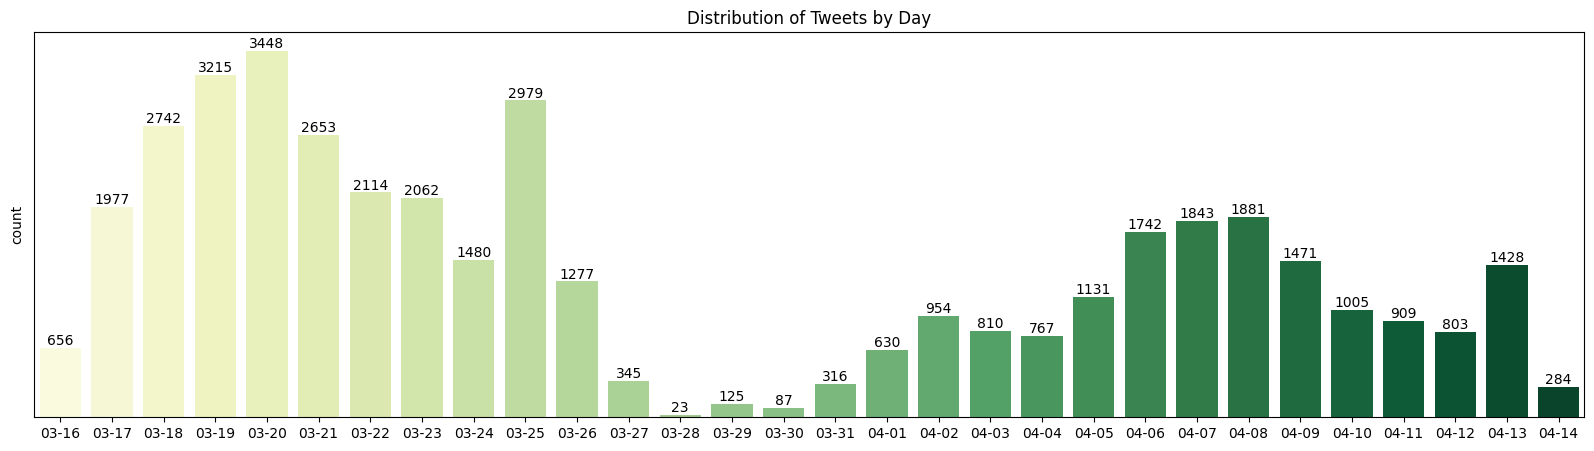

In [16]:
plt.figure(figsize=(20,5))
ax = sns.barplot(data=distr_byday ,
                 x='index',
                 y='counts',
                 ci=False,
                 palette='YlGn')
plt.title('Distribution of Tweets by Day')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

### Data cleaning 

In [22]:
#Remove punctuations, links, mentions and \r\n new line characters
def cleaner_charachers(text):
    #remove \n and \r and lowercase
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower()
    #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    text = re.sub(r'[^\x00-\x7f]',r'', text) 
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

def clean_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2


#Clean emojis from text
def clean_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji


In [29]:
texts_train = []
for t in data_train['OriginalTweet']:
    texts_train.append(clean_emoji(clean_hashtags(cleaner_charachers(clean_spaces(t)))))

/var/folders/0s/v8npxdtd5t59fr9_mk2gbs4r0000gn/T/ipykernel_3317/4049811618.py:25: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji


In [30]:
texts_test = []
for t in data_test['OriginalTweet']:
    texts_test.append(clean_emoji(clean_hashtags(cleaner_charachers(clean_spaces(t)))))

/var/folders/0s/v8npxdtd5t59fr9_mk2gbs4r0000gn/T/ipykernel_3317/4049811618.py:25: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji


In [31]:
data_train['preprocessed'] = texts_train
data_test['preprocessed'] = texts_test

In [34]:
data_train.preprocessed.sample(5)


16084    i have a friend who is van driver for asda and...
17890    i have been ill for 8 days with what i can onl...
21003    does anyone remember when bathandbodyworks sol...
4838     the nhs workers must remain in our thoughts an...
13059    i add my thanks to the supermarket staff who a...
Name: preprocessed, dtype: object

In [38]:
data_train['length']=data_train['preprocessed'].apply(lambda x: len(x.split()))
data_test['length']=data_test['preprocessed'].apply(lambda x: len(x.split()))

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,preprocessed,length
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,2
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,38
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,13
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,41
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...,39
...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...,11
41153,44952,89904,NaN,2020-04-14,Response to complaint not provided citing COVI...,Extremely Negative,response to complaint not provided citing covi...,22
41154,44953,89905,NaN,2020-04-14,You know itÂs getting tough when @KameronWild...,Positive,you know its getting tough when is rationing ...,16
41155,44954,89906,NaN,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...,18
